# Experiment $n$ - NAME
***

**Date: **
**Data taken by:**

**Equipment used:**
1. Instrument 1 (LC: 0.1mm)
1. Instrument 2 (LC: 0.2V)
1. ...


In [6]:
######************************ INPUT YOUR DATA HERE ************************######

data_file = "exp_n_data_1.csv"            # Add the name of the data file (csv or txt). 
data_file = "exp1_ohm.csv"
x_label = r'x-axis (unit - e.g. $\mu$ A)' # X axis labels
y_label = r'y-axis (unit)'                # Y axis labels

round_slope = 3                           # Number of digits to round-off slope
round_intercept = 3                       # Number of digits to round-off intercept

#Once this is done, run the rest of the code: it should print a well formatted graph.

#********************************************************************************#

In [7]:
import numpy as np                   # Importing the NumPy package

import matplotlib.pyplot as plt      # Importing the Matplotlib package for plotting
                                     # "Magic" to display images inline
%matplotlib inline                   

import scipy as scp                  # Importing the SciPy package
from scipy.optimize import curve_fit # Importing the curve fitting module from SciPy

In [8]:
data = np.genfromtxt(data_file, delimiter=",") # Looks in the current directory for the csv (or txt) file
                                               # and imports it, with commas being treated as different
                                               # cell values.

xpoints = data[:,0]                            # Get the first column of data, and save it to xpoints
ypoints = data[:,1]                            # Idem for the second column and ypoints.

In [9]:
def f(x, a, b):                              # Define a function `f` which `returns` a value of a*x+b
    return a*x + b                           # This line makes sure that the function returns the above value

par, covariance = curve_fit(f, xpoints, ypoints)

m = np.round(par[0],round_slope)             # For simplicity, we assign the values of par[] to variables m 
c = np.round(par[1],round_intercept)         # and c, rounded off approrpiately using the np.round() function.

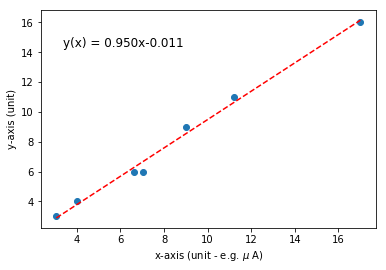

In [14]:
ytrend = m*xpoints+c                # Create an array of y values corresponding to the xpoints, 
                                    # which satisfy the trendline with the given slope (m) and intercept (c)
    
    
#####********Displaying a trendline on the graph area**********#####
eqn = 'y(x) = '+f'{m:.3f}'+'x'+f'{c:+}' # Equation of trendline as a string; we'll print this equation on the graph

xmin = np.min(xpoints)*1.1          # Coordinates to place the trendline: I have chosen to place it near the
ymax = np.max(ypoints)*0.9          # minimum x-coordinate and the maximum y-coordinate. You could use any two
                                    # points like (14,2), for example.

plt.text(xmin, ymax,eqn,fontsize=12)# Adding the equation string to the graph area, at xmin and ymax


#******************************************************************#


plt.scatter(xpoints,ypoints)        # Plotting the data-points
plt.plot(xpoints, ytrend, 'r--')    # Plotting the trend-line

plt.xlabel(x_label)                 # Formatting the axes
plt.ylabel(y_label)
plt.show();